# Titanic 

https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

> Kaggle Titanic 项目

## 导入所需模块以及设置 

In [2]:
## 导入模块以及环境设置
import pandas as pd
import numpy as np
import sklearn as skl
import os,sys,time
import matplotlib

%matplotlib inline

## 读取训练数据 

In [9]:
!ls

gender_submission.csv  test.csv       titanic字段说明.png  字段描述.md
README.md	       titanic.ipynb  train.csv


In [6]:
titanic_train_data = pd.read_csv('train.csv')
titanic_train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


![titanic字段说明.png](./titanic字段说明.png)

## 计算各变量的相关系数 

In [19]:
groupby_survived = titanic_train_data.groupby('Survived', as_index=False) # 按是否存活分组
groupby_sex = titanic_train_data.groupby('Sex', as_index=False) # 按性别分组
groupby_pclass = titanic_train_data.groupby('Pclass', as_index=False) # 按社会等级
groupby_sibsp = titanic_train_data.groupby('SibSp', as_index=False) # 按在船上的父母兄弟人数
groupby_parch = titanic_train_data.groupby('Parch', as_index=False) # 按在船上的孩子个数

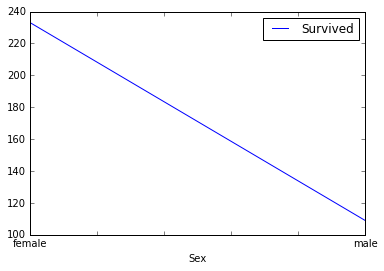

In [34]:
groupby_sex.sum().plot(x='Sex',y='Survived')

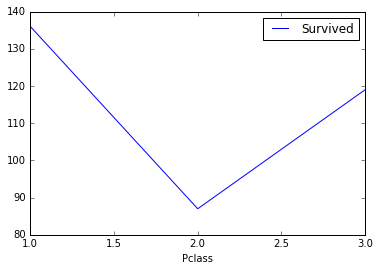

In [35]:
groupby_pclass.sum().plot(x='Pclass',y='Survived')

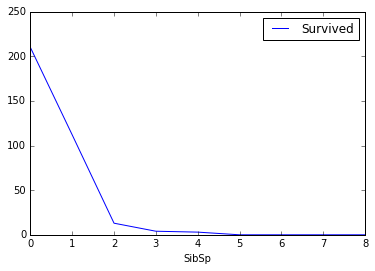

In [36]:
groupby_sibsp.sum().plot(x='SibSp',y='Survived')

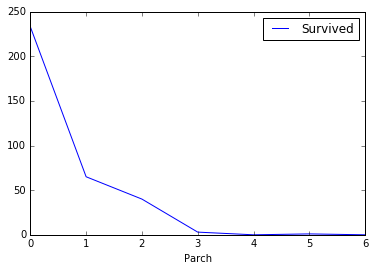

In [37]:
groupby_parch.sum().plot(x='Parch',y='Survived')

In [29]:
# 皮尔逊系数，np.corrcoef(a)可计算行与行之间的相关系数，np.corrcoef(a,rowvar=0)用于计算各列之间的相关系数
# np.corrcoef(groupby_sex, rowvar=0)